# CLUSTERING NIGERIAN SONGS

Classifying music into genres has always being more of an art than a science for music heads. However, the advent of streaming apps with their advanced playlist alogrithms created a process this task. 

This exercise uses an unsupervised learning algorithm known as K-Means clustering combined with a dimensionality reduction technique PCA to group Nigerian songs into sub-genres from the 'Afrobeats' main genre. The dataset is made up of 500+ songs released over a 20-year period (2000 - 2020). Audio Features such as; danceability, acoustiness, energy, instrumentalness, liveness, loudness, speechiness, tempo, and popularity were used for clustering.


## Contents

1. Definition of Terms

2. Importing Libraries and Dataset

3. Data Analysis and Pre-processing

4. Analyzing Audio Features

5. Clustering Process

6. Fixing Songs in Genres and listing results

7. Genre Distribution and Top Artists

8. Conclusion

## 1. Definition of Terms

Audio features are defined as a range of quantitative metrics that create a relatable and relevant profile for a song. While a genre is defined as a group of songs that shares a distinct style, form, pattern, and sometimes origin.
 
See below the definition of some these features.
acousticness - A confidence measure of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

danceability - this describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity

energy - measure representing perceptual intensity and activity. Typically, energetic tracks feel fast, loud, and noisy

instrumentalness - forecasts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal"

liveness - detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live

loudness - overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.

speechiness - detects the presence of spoken words in a track

tempo - overall speed or pace of a track measured in beats per minute (BPM) I

NB: For a better understanding of these audio features, check
[Spotify website](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features)

## 2. Importing Libraries and Dataset

In [166]:
#import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [169]:
#import dataset
naija_songs = pd.read_csv("C:\\Users\\ofagb\\OneDrive\\Documents\\Machine Learning\\nigerian_spotify_songs1.csv")

#exploratory data analysis
naija_songs. head(10)

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
5,Kasala,Pioneers,DRB Lasgidi,nigerian pop,2020,184800,26,0.803,0.1270,0.525,0.000007,0.1290,-10.034,0.1970,100.103,4
6,Pull Up,Everything Pretty,prettyboydo,nigerian pop,2018,202648,29,0.818,0.4520,0.587,0.004490,0.5900,-9.840,0.1990,95.842,4
7,take a break,rare.,Odunsi (The Engine),afropop,2018,141933,27,0.808,0.6080,0.300,0.000048,0.0863,-11.213,0.0453,119.964,4
8,Cash,Enjoy Your Life,Lady Donli,nigerian pop,2019,187714,36,0.846,0.2140,0.669,0.467000,0.0857,-7.822,0.0441,115.008,4
9,SATISFIED,GEMINI,Tay Iwar,alternative r&b,2019,123082,30,0.555,0.9120,0.295,0.275000,0.0967,-11.038,0.0360,77.033,4


## 3. Data Analysis and Pre-processing

In [179]:
#drop columns not releated to music features
naija_songs2 = naija_songs.drop(columns = ['album', 'artist_top_genre', 'release_date', 'length'], axis = 1)
naija_songs2. head(10)

,name,artist,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Cruel Santino,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,Odunsi (The Engine),30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,AYLØ,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Lady Donli,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,Odunsi (The Engine),25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
5,Kasala,DRB Lasgidi,26,0.803,0.1270,0.525,0.000007,0.1290,-10.034,0.1970,100.103,4
6,Pull Up,prettyboydo,29,0.818,0.4520,0.587,0.004490,0.5900,-9.840,0.1990,95.842,4
7,take a break,Odunsi (The Engine),27,0.808,0.6080,0.300,0.000048,0.0863,-11.213,0.0453,119.964,4
8,Cash,Lady Donli,36,0.846,0.2140,0.669,0.467000,0.0857,-7.822,0.0441,115.008,4
9,SATISFIED,Tay Iwar,30,0.555,0.9120,0.295,0.275000,0.0967,-11.038,0.0360,77.033,4


In [172]:
#checking for unique values across columns
naija_songs2.nunique()

name                497
artist              171
popularity           66
danceability        304
acousticness        406
energy              329
instrumentalness    294
liveness            362
loudness            504
speechiness         386
tempo               514
dtype: int64

In [20]:
#checking for null values
naija_songs2.isnull().sum()

name                0
artist              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
dtype: int64

In [21]:
#checking for data types
naija_songs2.dtypes

name                 object
artist               object
popularity            int64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
dtype: object

In [180]:
#feature selection - checking for correlation among numerical features
audio_features = naija_songs2.drop(columns = ['name', 'artist'], axis = 1)
audio_features.corr()

,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
popularity,1.000000,0.053882,0.067167,-0.175452,0.022462,-0.044513,-0.082398,-0.042392,-0.012741,0.072048
danceability,0.053882,1.000000,-0.129683,-0.033595,-0.037527,-0.212850,0.002458,-0.219732,-0.097768,0.008066
acousticness,0.067167,-0.129683,1.000000,-0.285542,0.072476,0.033921,-0.171519,0.056415,-0.080931,0.016080
energy,-0.175452,-0.033595,-0.285542,1.000000,-0.049213,0.071455,0.731560,-0.033616,0.171561,-0.143616
instrumentalness,0.022462,-0.037527,0.072476,-0.049213,1.000000,0.006225,-0.076824,-0.063664,-0.046052,0.000668
liveness,-0.044513,-0.212850,0.033921,0.071455,0.006225,1.000000,-0.040191,0.131971,0.036074,-0.024538
loudness,-0.082398,0.002458,-0.171519,0.731560,-0.076824,-0.040191,1.000000,-0.061602,0.135017,-0.075683
speechiness,-0.042392,-0.219732,0.056415,-0.033616,-0.063664,0.131971,-0.061602,1.000000,0.024836,0.014350
tempo,-0.012741,-0.097768,-0.080931,0.171561,-0.046052,0.036074,0.135017,0.024836,1.000000,-0.080323
time_signature,0.072048,0.008066,0.016080,-0.143616,0.000668,-0.024538,-0.075683,0.014350,-0.080323,1.000000


<AxesSubplot:>

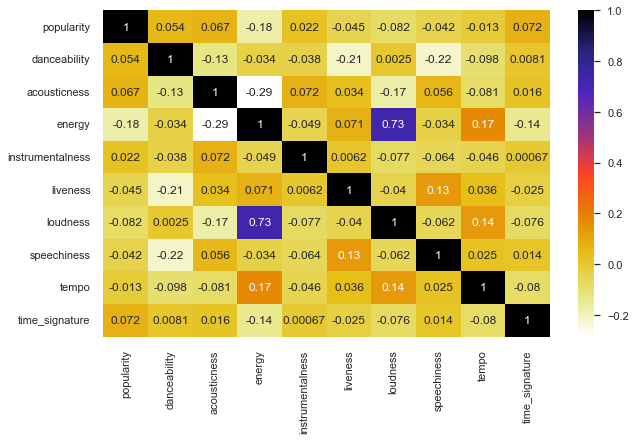

In [181]:
#visualizing correlations
plt.figure(figsize=(10,6))
sns.heatmap(audio_features.corr(), annot = True, cmap=plt.cm.CMRmap_r)

In [184]:
#energy and loudness have a high correlation of 0.73. One of the features (loudness) will be dropped
audio_features2 = audio_features.drop(columns = ['loudness'], axis = 1)
audio_features2.head(10)


,popularity,danceability,acousticness,energy,instrumentalness,liveness,speechiness,tempo,time_signature
0,48,0.666,0.8510,0.420,0.534000,0.1100,0.0829,133.015,5
1,30,0.710,0.0822,0.683,0.000169,0.1010,0.3600,129.993,3
2,40,0.836,0.2720,0.564,0.000537,0.1100,0.0424,130.005,4
3,14,0.894,0.7980,0.611,0.000187,0.0964,0.1130,111.087,4
4,25,0.702,0.1160,0.833,0.910000,0.3480,0.0447,105.115,4
5,26,0.803,0.1270,0.525,0.000007,0.1290,0.1970,100.103,4
6,29,0.818,0.4520,0.587,0.004490,0.5900,0.1990,95.842,4
7,27,0.808,0.6080,0.300,0.000048,0.0863,0.0453,119.964,4
8,36,0.846,0.2140,0.669,0.467000,0.0857,0.0441,115.008,4
9,30,0.555,0.9120,0.295,0.275000,0.0967,0.0360,77.033,4


## 4. Analyzing Audio Features

Text(0.5, 0, 'Year')

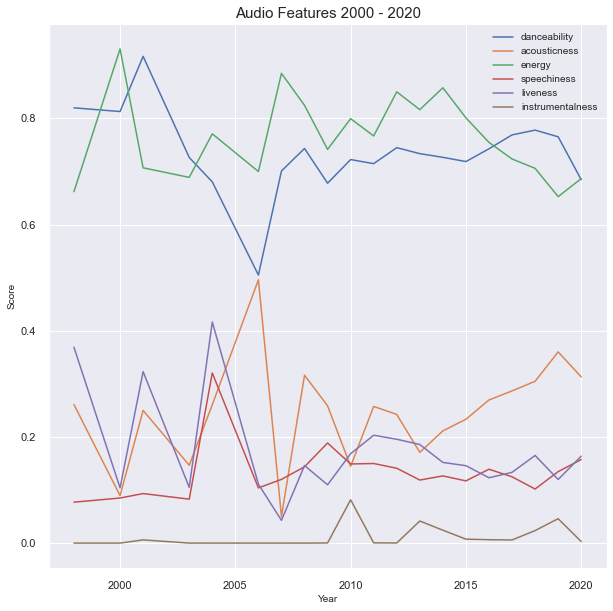

In [187]:
#Audio features of songs over the years
plt.figure(figsize=(10, 10))
sns.set(style= 'darkgrid')
audio_features2 = ['danceability','acousticness','energy','speechiness','liveness',"instrumentalness"]
for c in audio_features2:
    # group the data by year, and plot the mean score of all music in that year
    x = naija_songs.groupby("release_date")[c].mean()
    ax= sns.lineplot(x=x.index,y=x,label=c)

ax.set_title('Audio Features 2000 - 2020', fontsize = 15)
ax.legend(fancybox=True, framealpha=1, shadow=True, prop={'size': 10}, loc = 'upper right')
ax.set_ylabel('Score', fontsize = 10)
ax.set_xlabel('Year', fontsize = 10)

A quick review of audio features from 2000 to 2020 shows Nigerian artists placed the most emphasis on danceability and energy in their songs. Both features peaked at the turn of the millennium, with the former dipping sharply from 2002–2005, then recovering afterward.

Also, there were spikes in acousticness, speechiness, and liveness during the early to mid noughties, with these features remaining relatively stable in subsequent years.

Lastly, it can be seen that instrumentalness is the least important attribute during the period under review. 

## 5. Clustering Process

In [188]:
#standardization
scaler = StandardScaler()
audio_features2_std = scaler.fit_transform(audio_features2)

In [189]:
#fitting standardised data using PCA
pca = PCA()
pca.fit(audio_features2_std)

PCA()

In [190]:
#variance generated by each feature 
pca.explained_variance_ratio_

array([0.1688229 , 0.15931777, 0.11630823, 0.11027095, 0.10593084,
       0.09702428, 0.09148321, 0.08015953, 0.07068229])

In [191]:
#creating visuation of pca variance ratio
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

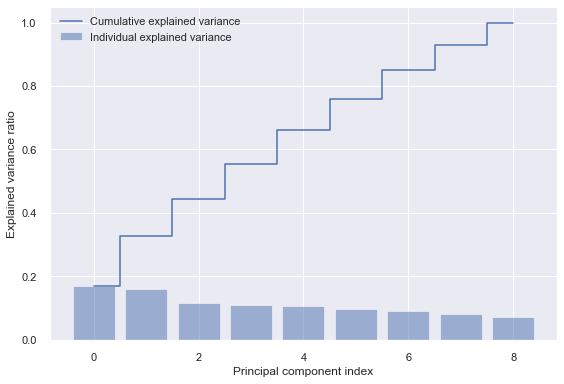

In [216]:
#plotting graph
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [207]:
#six features are the key components for cust_data. Theyare then used for PCA
pca = PCA(n_components = 6)
pca.fit(audio_features2_std)

PCA(n_components=6)

In [35]:
pca.transform(features2_std)

array([[ 3.59996678,  2.70658104,  4.3540757 ,  2.722456  , -1.15956928,
         1.02408661],
       [-0.54441277,  0.85660951, -1.38428996,  0.38199355, -0.07448585,
         2.15024959],
       [ 1.48468976, -0.56743886, -0.53121221,  1.20351919,  0.14013077,
        -0.47155325],
       ...,
       [-0.88415234, -0.45105106,  0.49080989, -0.36630131, -0.13377033,
        -0.81907177],
       [-0.89737492, -0.73050663, -0.47449997, -0.68446881, -0.59582735,
         1.15162246],
       [-1.01445981, -1.12934098,  0.30113092, -0.97496104,  0.14174592,
         0.25892251]])

In [208]:
pca_scores = pca.transform(audio_features2_std)

C:\Users\ofagb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



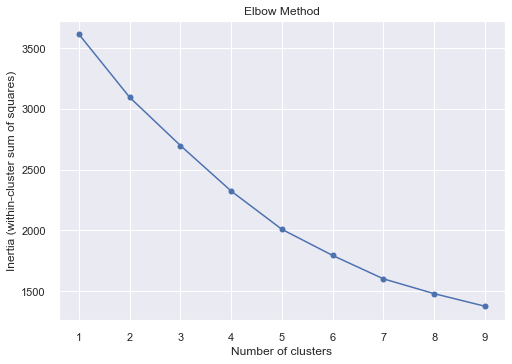

In [209]:
#KMeans clustering using PCA - Determine nos of clusters K
Ks = range(1, 10)
inertia = [KMeans(i).fit(pca_scores).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method')
plt.show()

C:\Users\ofagb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



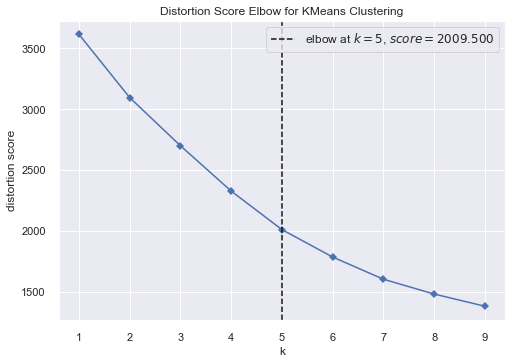

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [210]:
#visualizing the appropriate number of clusters
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(pca_scores)
visualizer.show()

In [211]:
#Splitting songs into 5 genres
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(pca_scores)
unique_labels = np.unique(label)

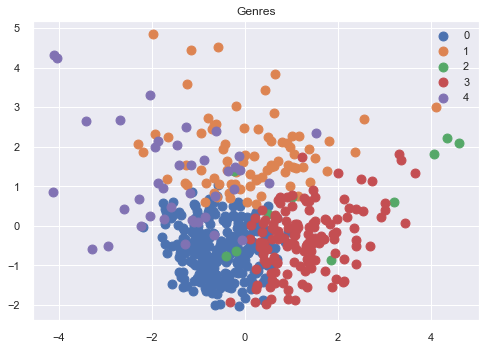

In [212]:
#Plotting clusters
for i in unique_labels:
    plt.scatter(pca_scores[label==i,0], pca_scores[label==i,1], label=i, s=80)
    
plt.legend()
plt.title('Genres')
plt.show()

## 6. Fitting songs into Genres and listing results

In [200]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(pca_scores)

# print inertia & cluster center
print("inertia for k=4 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=4 is 3082.6321271442084
cluster centers:  [[-5.54359962e-01 -5.88745927e-01  1.20701286e-03 -3.66713780e-01
   1.46301114e-02 -1.58565499e-01 -9.07395270e-02  6.24241034e-02
  -9.43170653e-02]
 [ 5.81301908e-02  1.76425169e+00 -3.93828761e-01 -6.26787320e-01
   6.50084739e-02  1.48184163e-01  1.70418565e-01  2.24222550e-01
   1.17329967e-01]
 [-1.51794821e+00  1.21074344e+00  2.87143770e-01  2.34190414e+00
  -6.50829840e-01 -7.81118407e-01 -2.50889774e-01 -6.92402153e-01
   5.62457142e-01]
 [ 1.59286297e+00  5.15500693e-01  5.42747081e+00 -3.57343870e-01
   3.11688723e+00 -1.17598330e+00  2.16087224e+00 -9.69255658e-01
  -2.02967619e-01]
 [ 1.25796067e+00 -3.28056573e-01 -1.79720653e-01  4.97390272e-01
  -1.03921052e-01  4.69841277e-01 -1.29160793e-02 -1.76851479e-02
  -2.49755222e-02]]
cluster labels:  [3 2 4 4 3 4 1 4 3 4 3 2 1 1 4 4 2 2 4 4 4 4 2 4 4 4 4 2 4 0 4 0 0 2 4 4 0
 4 4 0 4 4 4 0 0 0 4 1 1 4 4 0 1 2 4 0 0 4 0 4 0 0 4 4 1 4 2 4 4 0 0 0 0 0
 4 4 2 4 4 4 0 4 0 0 

In [273]:
#list results
result = pd.DataFrame({'Artist':naija_songs2['artist'], 'Song_Title':naija_songs2['name'], 'Genre_No':y})
result.head(10)

,Artist,Song_Title,Genre_No
0,Cruel Santino,Sparky,3
1,Odunsi (The Engine),shuga rush,2
2,AYLØ,LITT!,4
3,Lady Donli,Confident / Feeling Cool,4
4,Odunsi (The Engine),wanted you,3
5,DRB Lasgidi,Kasala,4
6,prettyboydo,Pull Up,1
7,Odunsi (The Engine),take a break,4
8,Lady Donli,Cash,3
9,Tay Iwar,SATISFIED,4


In [274]:
#create new column to properly name genres
result['Genre_Name'] = result['Genre_No'].map({0:'Afro Dancehall', 1:'Afro RnB', 2:'Afro Fusion',3:'Alte', 4: 'Afro Pop'})
result

,Artist,Song_Title,Genre_No,Genre_Name
0,Cruel Santino,Sparky,3,Alte
1,Odunsi (The Engine),shuga rush,2,Afro Fusion
2,AYLØ,LITT!,4,Afro Pop
3,Lady Donli,Confident / Feeling Cool,4,Afro Pop
4,Odunsi (The Engine),wanted you,3,Alte
5,DRB Lasgidi,Kasala,4,Afro Pop
6,prettyboydo,Pull Up,1,Afro RnB
7,Odunsi (The Engine),take a break,4,Afro Pop
8,Lady Donli,Cash,3,Alte
9,Tay Iwar,SATISFIED,4,Afro Pop


## 7. Genre Distribution and Top Artists

### Genre Distribution

In [205]:
#Genre Distribution
Genre_Distr = result.Genre_Name.value_counts()
Genre_Distr

Afro Dancehall    259
Afro Pop          141
Afro RnB           86
Afro Fusion        35
Alte                9
Name: Genre_Name, dtype: int64

[Text(0.5, 1.0, 'Genre Distribution')]

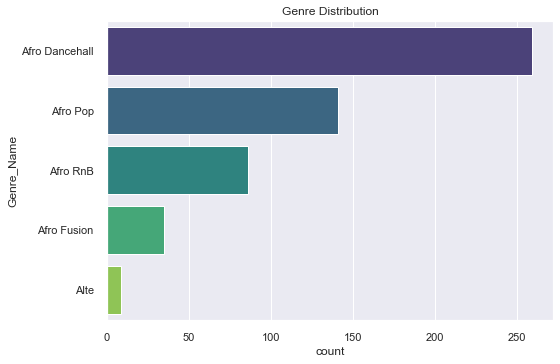

In [223]:
#Visualisating Genre distribution
sns.countplot(y = 'Genre_Name', data = result, palette='viridis', 
              order = result['Genre_Name'].value_counts().index).set(title='Genre Distribution')

### Top Artists

In [278]:
#Splitting Genres into separate dataframes
Alte = result[result['Genre_Name'] == 'Alte']
Afro_RnB = result[result['Genre_Name'] == 'Afro RnB']
Afro_Fusion = result[result['Genre_Name'] == 'Afro Fusion']
Afro_Dancehall = result[result['Genre_Name'] == 'Afro Dancehall']
Afro_Pop = result[result['Genre_Name'] == 'Afro Pop']

#shortening artist name
result.replace('Odunsi (The Engine)', 'Odunsi', inplace = True)

[Text(0.5, 1.0, 'Top Artist')]

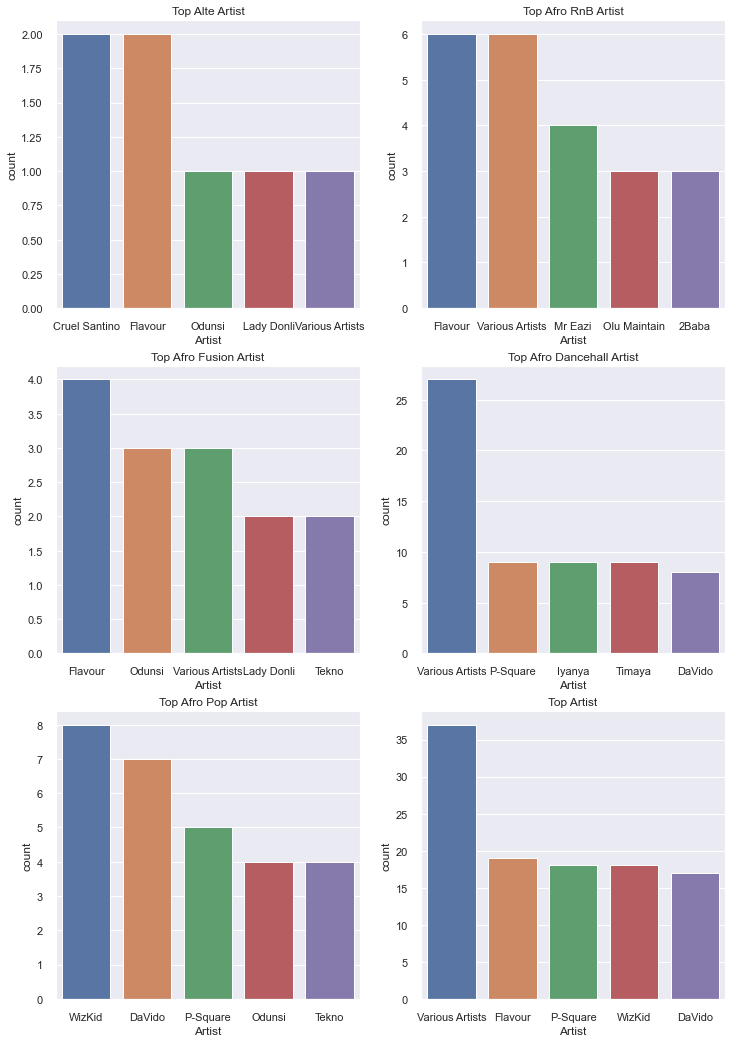

In [282]:
#Visualizing top artist from each genre
fig, axes = plt.subplots(3, 2, figsize = (12,18))

#create boxplot in each subplot
sns.countplot(x='Artist', data= Alte, order= Alte['Artist'].value_counts().
              head(5).index, ax =axes[0,0]).set(title='Top Alte Artist')
sns.countplot(x='Artist', data= Afro_RnB, order= Afro_RnB['Artist'].value_counts().
              head(5).index, ax=axes[0,1]).set(title='Top Afro RnB Artist')
sns.countplot(x='Artist', data= Afro_Fusion, order= Afro_Fusion['Artist'].value_counts().
              head(5).index, ax=axes[1,0]).set(title='Top Afro Fusion Artist')
sns.countplot(x='Artist', data= Afro_Dancehall, order= Afro_Dancehall['Artist'].value_counts().
              head(5).index, ax=axes[1,1]).set(title='Top Afro Dancehall Artist')
sns.countplot(x='Artist', data= Afro_Pop, order= Afro_Pop['Artist'].value_counts().
              head(5).index, ax=axes[2,0]).set(title='Top Afro Pop Artist')
sns.countplot(x='Artist', data= result, order = result['Artist'].value_counts().
              head(5).index, ax=axes[2,1]).set(title='Top Artist')

## 8. CONCLUSION
The aim of this study was to separate Nigerian songs into distinct groups using audio features instead of lumping all songs under the Afrobeats umbrella. 503 songs were segmented into 5 clusters using 6 principal components which explained approximately 76% of the variation in the dataset.
No surprise Afropop and Afro Dancehall are the most popular genres given the importance Nigerian musicians place on danceability and energy as audio features. Alte is a new wave sound, had the lowest no of entries. The most difficult genre to name was Afro-Fusion, this was because the genre contained artists that blended multiple genres like; Alte, Highlife, and RnB to create one sound.
Lastly, the artists with the most entries were also highlighted.

Alte - Cruel Santino, Odunsi, Lady Donli

Afro RnB - Flavour, Mr Eazi, 2Baba

Afro Fusion - Flavour, Odunsi, Tekno

Afro Dancehall - P Square, Iyanya, Timya

Afro Pop - Wizkid, Davido, P Square

Overall - Flavour, P-Square, Wizkid

Thanks for your time and kindly check out my other works on my professional websites

[Kaggle Dataset](https://www.kaggle.com/datasets/sootersaalu/nigerian-songs-spotify)

[Linkedin](https://www.linkedin.com/in/olalekan-fagbuyi-86781b8a/)

[Medium](https://medium.com/@leks139)

[Tableau](https://public.tableau.com/app/profile/olalekan.fagbuyi)